In [1]:
# importation des librairies
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.diagnostic import het_white , normal_ad
import statsmodels.formula.api as smf
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression

# Clustering & ACP
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Régression logistique
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
pip install functions

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importation des données
billets_data = pd.read_csv(r"C:\Users\nomad\Downloads\billets.csv", sep=";")

In [4]:
billets_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
# affiche les Dtypes des données
print("Dtypes :")
print(billets_data.dtypes)

Dtypes :
is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [6]:
billets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
billets_data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [8]:
billets_data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
# Analyse descriptive

            diagonal  height_left  height_right  margin_low  margin_up  length
is_genuine                                                                    
False            500          500           500         492        500     500
True            1000         1000          1000         971       1000    1000


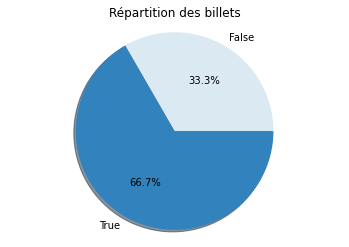

In [10]:
# Repartition des vrais/faux billets dans notre dataset d'apprentissage:
print(billets_data.groupby(["is_genuine"]).count())

# Graphique:
fig1, ax1 = plt.subplots()
ax1.pie(billets_data.groupby(["is_genuine"])["diagonal"].count(),
        labels=["False","True"],
        autopct="%1.1f%%",
        colors=["#dbe9f3","#3182bd"],
        shadow=True)
ax1.axis("equal")
plt.title("Répartition des billets")
plt.show()

In [11]:
Reg_Lin_Train_df = billets_data.dropna()
Reg_Lin_Test_df = billets_data[billets_data.isnull().any(axis=1)]

# Creation de X_train et Y_train:
x_train = Reg_Lin_Train_df.drop("margin_low", axis=1)
y_train = Reg_Lin_Train_df["margin_low"]

In [12]:
# Regression lineaire:
reg_lin = LinearRegression()
model_reg_lin = reg_lin.fit(x_train, y_train)

# Predictions:
x_train = Reg_Lin_Train_df[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]
Reg_Lin_Train_df["margin_low_pred"] = reg_lin.predict(x_train)

C:\Users\nomad\AppData\Local\Temp\ipykernel_9648\2818419497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_Lin_Train_df["margin_low_pred"] = reg_lin.predict(x_train)


In [13]:
print("Intercept:", model_reg_lin.intercept_)
print("Coéfficients:", model_reg_lin.coef_)

Intercept: 2.8668228920543575
Coéfficients: [-1.14059676 -0.0130159   0.02829069  0.02674982 -0.21284432 -0.00388299]


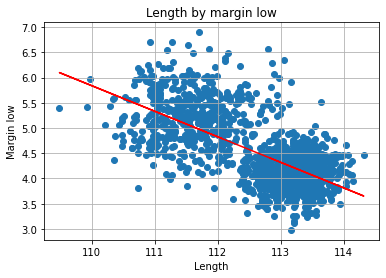

Pvalue:  8.97556709101762e-189


In [14]:
# régression linéaire entre length et margin_low
slope, intercept, r_value, p_value, std_err = st.linregress(Reg_Lin_Train_df.length, Reg_Lin_Train_df.margin_low)
regression_lineaire = (slope*Reg_Lin_Train_df.length)+intercept
# affiche le graphique
plt.scatter(Reg_Lin_Train_df.length, Reg_Lin_Train_df.margin_low)
plt.plot(Reg_Lin_Train_df.length, regression_lineaire, color="red")
plt.xlabel("Length")
plt.ylabel("Margin low")
plt.title("Length by margin low")
plt.grid()
plt.show()
print("Pvalue: ",p_value)

In [15]:
reg_multi = smf.ols('margin_low~margin_up+height_right+height_left+diagonal+length', data=Reg_Lin_Train_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.60e-202
Time:                        09:11:59   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

In [16]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

In [17]:
df_res = billets_data.copy()

La p-value du test d'Aderson-Darling vaut 0.0


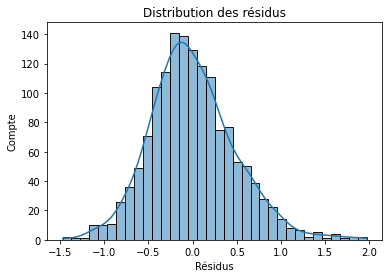

In [18]:
# Creation d'une colonne contenant les residus:
df_res['residu_s'] = reg_multi.resid

# Normalite:
print("La p-value du test d'Aderson-Darling vaut", normal_ad(df_res['residu_s'])[1])

# Graphique:
sb.histplot(df_res['residu_s'], kde=True)
plt.xlabel("Résidus")
plt.ylabel("Compte")
plt.title("Distribution des résidus")
plt.show()

In [19]:
#Une p-value inférieure à alpha pour le test d'Anderson-Darling indique que l'hypothèse nulle de normalité de la distribution des résidus est rejetée. Ici, l'hypothèse n'est pas rejetée puisque la p-value obtenue est inférieure au seuil alpha 5 % (ou 1 %), les résidus suivent une distribution Normale.

In [20]:
# Affiche les rows qui contiennent des NaN
is_NaN = billets_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = billets_data[row_has_NaN]

In [21]:
# Créé un dataframe contenant les données complétées par la regression linéaire multiple
a_prevoir = rows_with_NaN.drop(columns=['is_genuine','margin_low'])
margin_low_prev = reg_multi.predict(a_prevoir)
billets_data_2 = billets_data
billets_data_2["margin_low"] = billets_data_2["margin_low"].fillna(value=round(margin_low_prev,2))

In [22]:
#Knn, regression logistique, comparaison des deux, 

In [23]:
# préparation des données
X = billets_data_2.values
names = billets_data_2.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

b_data_scaled = pd.DataFrame(X_scaled,
                  index=billets_data_2.index,
                  columns=billets_data_2.columns)

C:\Users\nomad\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


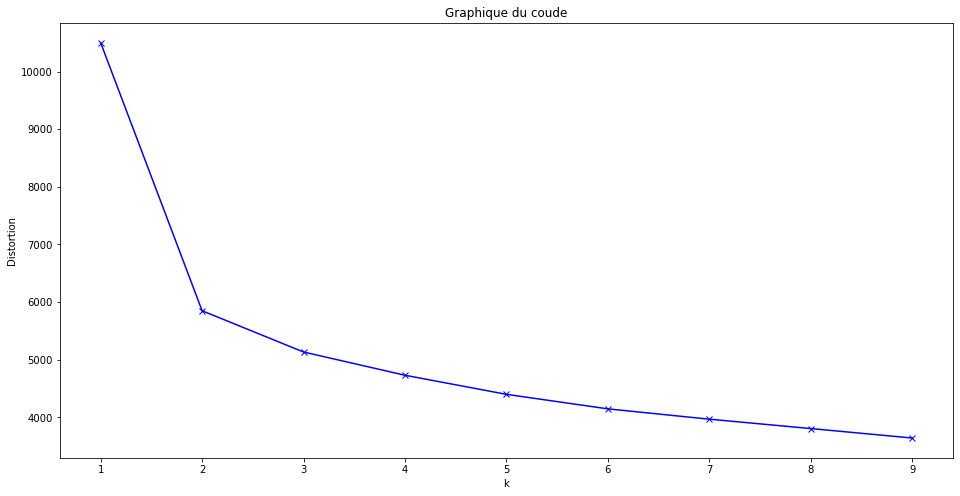

In [24]:
#Calcule le graphique du coude pour déterminer le nombre idéal de clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(b_data_scaled)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Graphique du coude')
plt.show()

C:\Users\nomad\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


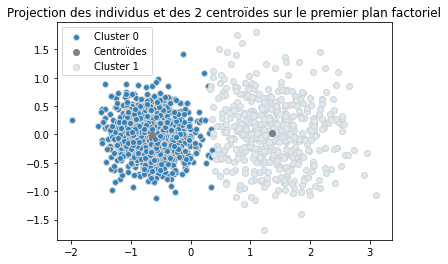

is_genuine  False  True
row_0                  
0              19   997
1             481     3


In [25]:
# Nombre de clusters:
n_clust = 2

# Clustering par K-means:
km = KMeans(n_clusters=n_clust,random_state=1994)
x_km = km.fit_transform(billets_data_2[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

# Ajout d'une colonne contenant le cluster attribue:
clusters_km = km.labels_
#billets_data_2["cluster_km"] = km.labels_
#billets_data_2["cluster_km"] = billets_data_2["cluster_km"].apply(str)

centroids_km = km.cluster_centers_

# Clustering par projection des individus sur le premier plan factoriel:
pca_km = decomposition.PCA(n_components=3).fit(billets_data_2[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components=3).fit_transform(billets_data_2[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_km_projected = pca_km.transform(centroids_km)

# Graphique:
for couleur,k in zip(["#3182bd","#dbe9f3"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1],color="grey",label="Centroïdes")
plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroids_km)))
plt.show()

#Verrfication de la classification: Matrice de confusion:
km_matrix = pd.crosstab(clusters_km,billets_data_2["is_genuine"])
print(km_matrix)

Text(0.5, 1.0, 'Matrice de confusion K-means\n')

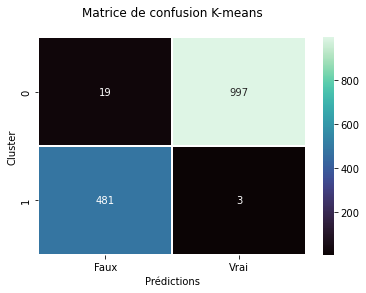

In [26]:
# Graphique:
sb.heatmap(km_matrix,
            annot = True,
            fmt = ".3g", 
            cmap = sb.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")

In [27]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color="black"))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor="black")
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, c=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, c=c,)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha)

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, edgecolor="grey")
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=True)

In [28]:
# Calcul des composantes principales
n_comp = 6
pca = decomposition.PCA(n_components=n_comp)
pca.fit(b_data_scaled)

PCA(n_components=6)

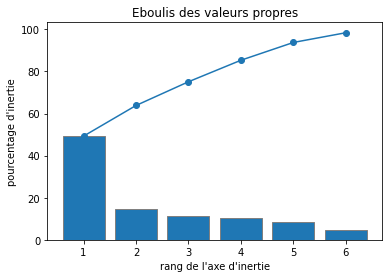

In [29]:
# Calcul du pourcentage d'inertie
display_scree_plot(pca)

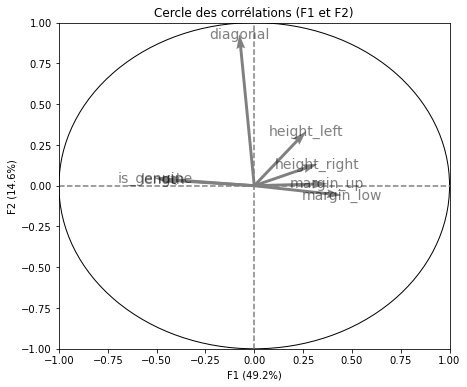

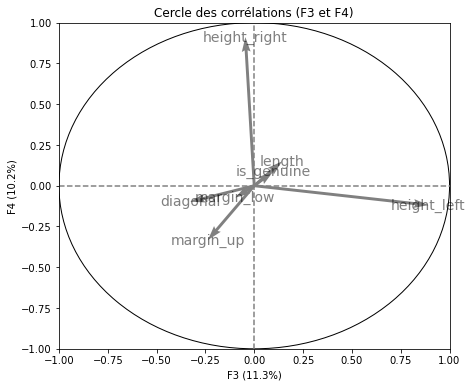

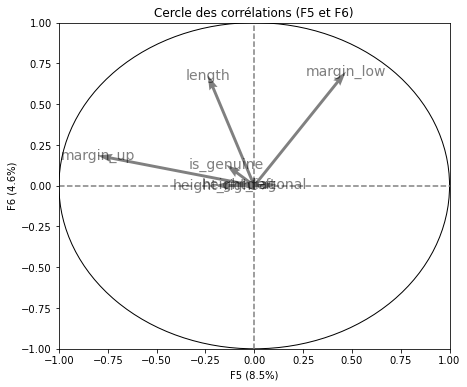

In [30]:
# Cercle des corrélations
features = b_data_scaled.columns
pcs = pca.components_
display_circles(pcs, n_comp=6, pca=pca, axis_ranks=[(0,1),(2,3),(4,5)], labels = np.array(features))

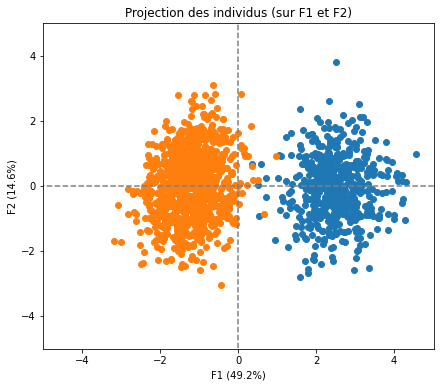

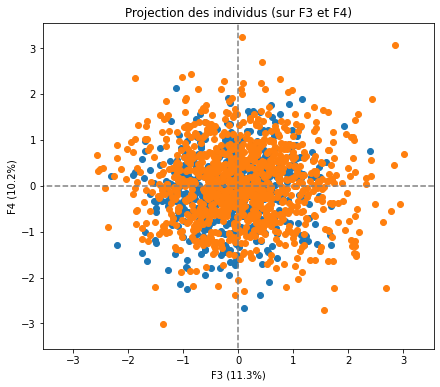

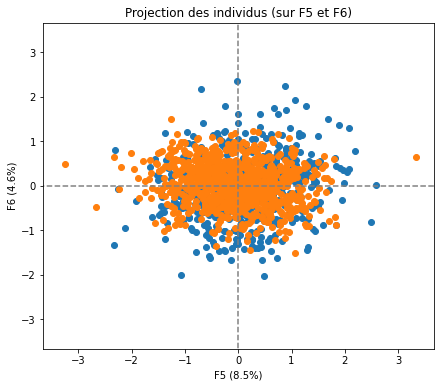

In [31]:
# Projection des individus
X_projected = pca.transform(b_data_scaled)
display_factorial_planes(X_projected, n_comp=6, pca=pca, axis_ranks=[(0,1),(2,3),(4,5)], labels=None, alpha=1, illustrative_var=billets_data_2.is_genuine.values.astype(int))
plt.show()

Text(0.5, 1.0, 'Heatmap sur les centroïdes de K-means')

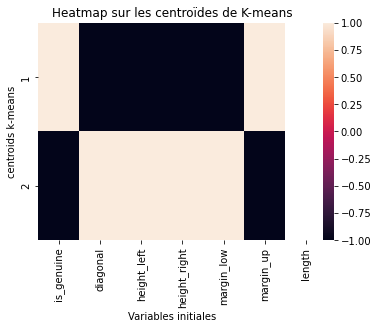

In [32]:
#Heatmap sur les centroides de k-means:

# Centrage et reduction:
centroid_std_scale = preprocessing.StandardScaler().fit(centroids_km)
centroids_scaled = centroid_std_scale.transform(centroids_km)

sb.heatmap(centroids_scaled, yticklabels=[1,2],xticklabels=billets_data_2.columns.tolist())
plt.ylabel("centroids k-means")
plt.xlabel("Variables initiales")
plt.title("Heatmap sur les centroïdes de K-means")

Text(0.5, 1.0, 'Boîtes à moustaches')

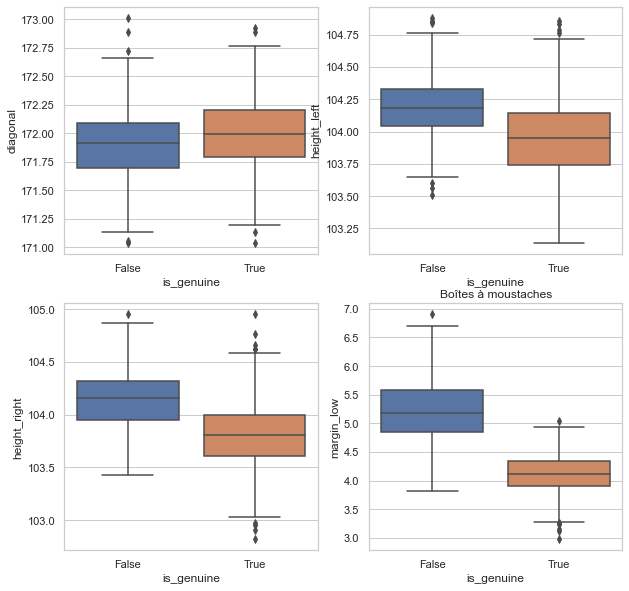

In [33]:
# Afficher des boxplot
plt.figure(figsize=(10, 10))
sb.set(style="whitegrid")
plt.subplot(221)
sb.boxplot(x="is_genuine", y="diagonal", data=billets_data_2)
plt.subplot(222)
sb.boxplot(x="is_genuine", y="height_left", data=billets_data_2)
plt.subplot(223)
sb.boxplot(x="is_genuine", y="height_right", data=billets_data_2)
plt.subplot(224)
sb.boxplot(x="is_genuine", y="margin_low", data=billets_data_2)
plt.title('Boîtes à moustaches')

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

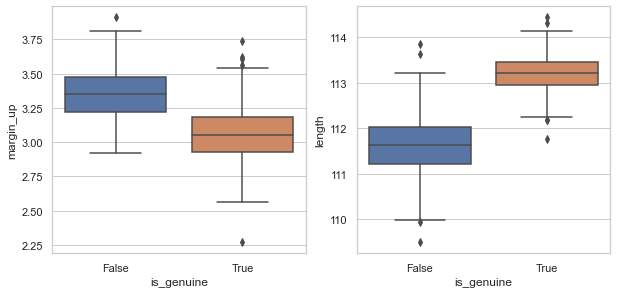

In [34]:
# Afficher des boxplot
plt.figure(figsize=(10, 10))
sb.set(style="whitegrid")
plt.subplot(221)
sb.boxplot(x="is_genuine", y="margin_up", data=billets_data_2)
plt.subplot(222)
sb.boxplot(x="is_genuine", y="length", data=billets_data_2)

In [35]:
leng_t = billets_data_2[billets_data_2.is_genuine == True].length
leng_f = billets_data_2[billets_data_2.is_genuine == False].length

In [36]:
fvalue, pvalue= st.f_oneway(leng_t, leng_f)
print('f_value:',fvalue, ', p_value:',pvalue )

f_value: 3876.654137826162 , p_value: 0.0


In [37]:
#p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'length' des vrais billets et faux billets ne sont pas égaux.

In [38]:
marg_t = billets_data_2[billets_data_2.is_genuine == True].margin_low
marg_f = billets_data_2[billets_data_2.is_genuine == False].margin_low

In [39]:
fvalue, pvalue= st.f_oneway(marg_t, marg_f)
print('f_value:',fvalue, ', p_value:',pvalue )

f_value: 2380.7878722112587 , p_value: 8.809267945164e-312


In [40]:
#p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [41]:
#KNN

In [42]:
X = billets_data_2.drop(['is_genuine'], axis=1)
Y = billets_data_2["is_genuine"]

In [43]:
# Séparer training / testing set
X_train_k, X_test_k, Y_train_k, Y_test_k = train_test_split(X,Y,test_size=0.2, random_state=5)

In [44]:
X_train_k.shape

(1200, 6)

In [45]:
X_test_k.shape

(300, 6)

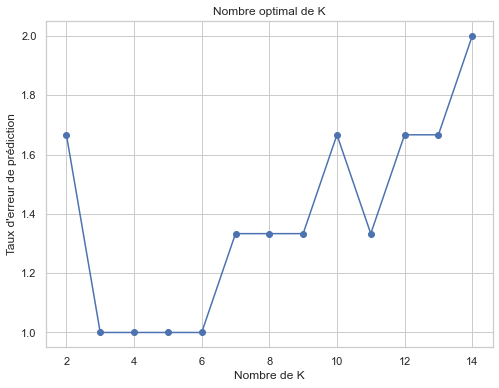

In [46]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_k, Y_train_k).score(X_test_k, Y_test_k)))
plt.figure(figsize=(8, 6))
plt.plot(range(2,15), errors, 'o-')
plt.title('Nombre optimal de K')
plt.ylabel("Taux d'erreur de prédiction")
plt.xlabel('Nombre de K')
plt.show()
plt.show()

In [47]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train_k, Y_train_k)

KNeighborsClassifier(n_neighbors=3)

In [48]:
Y_pred_test_k= knn.predict(X_test_k)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


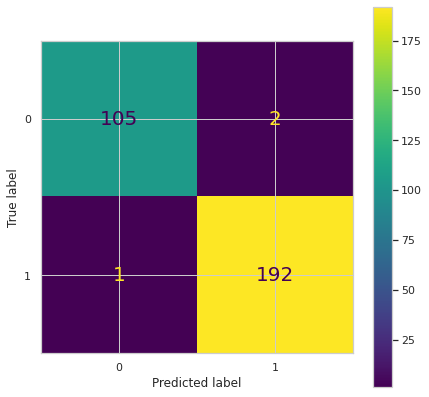

In [49]:
font = {'family' : 'normal', 'size': 20}
plt.rc('font', **font)

cm_k = confusion_matrix(Y_test_k, Y_pred_test_k)
cmp = ConfusionMatrixDisplay(cm_k)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_k, Y_pred_test_k)
print("Le taux de prédiction correcte sur toutes les données de test = {}%".format( round(accuracy, 4)))

Le taux de prédiction correcte sur toutes les données de test = 0.99%


In [51]:
# Regression logistique avec SKlearn

In [52]:
X = billets_data_2.drop(['is_genuine'], axis=1)
y = billets_data_2["is_genuine"]

In [53]:
# Séparer training / testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=5)

In [54]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_test = model_logit.predict(X_test)

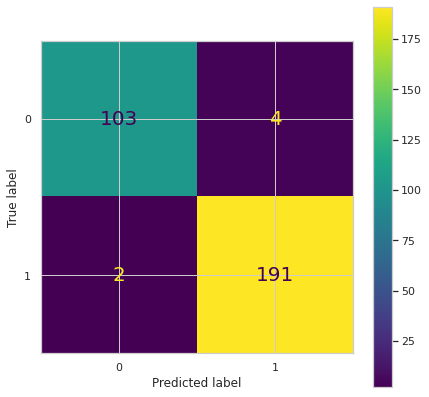

In [56]:
font = {'family' : 'normal', 'size': 20}
plt.rc('font', **font)

cm = confusion_matrix(y_test, y_pred_test)
cmp = ConfusionMatrixDisplay(cm)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Le taux de prédiction correcte sur toutes les données de test = {}%".format( round(accuracy, 4)))

Le taux de prédiction correcte sur toutes les données de test = 0.98%


In [58]:
#Test de l’algorithme

In [59]:
# importation des données
billets_production = pd.read_csv(r"C:\Users\nomad\Downloads\billets_production.csv")

In [60]:

billets_production.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [61]:
billets_values = billets_production.drop('id', axis=1)

In [67]:
y_pred_production = knn.predict(billets_values)

In [68]:
y_pred_production

array([False, False, False,  True,  True])

In [64]:
#Fonction du modèle de détection avec régression logistique

In [65]:
def verif_billet_rl(csv):
    billet_test= pd.read_csv(csv)
    billet_value=billet_test.drop('id', axis=1)
    y_pred = model_logit.predict(billet_value)
    proba_true = model_logit.predict_proba(billet_value)[:, 1]
    billet_test['Prediction'] = y_pred
    billet_test['Probability_is_true'] = proba_true.round(3)
    billets_predict_rl = billet_test[['id','Prediction','Probability_is_true']].set_index("id")
    return billets_predict_rl

In [66]:
# Tester le fonction
verif_billet_rl(r"C:\Users\nomad\Downloads\billets_production.csv")

,Prediction,Probability_is_true
id,,
A_1,False,0.004
A_2,False,0.001
A_3,False,0.001
A_4,True,0.918
A_5,True,1.000
